# Import Library 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Load Data 

In [2]:
os.chdir("/Users/sangga/Documents/Non kuliah/Data Fellowship/Dataset/Heart Disease - Binary")
os.listdir()

['.DS_Store',
 'Screen Shot 2020-07-20 at 18.57.02.png',
 'datasets_33180_43520_heart.csv']

In [3]:
heart = pd.read_csv("datasets_33180_43520_heart.csv")

# Data Understanding 

<img src="Screen Shot 2020-07-20 at 18.57.02.png" />

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.shape

(303, 14)

In [6]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
heart['target'].value_counts(normalize = True) * 100

1    54.455446
0    45.544554
Name: target, dtype: float64

# EDA

## Checking the distribution of each data 

/Users/sangga/.venvds/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


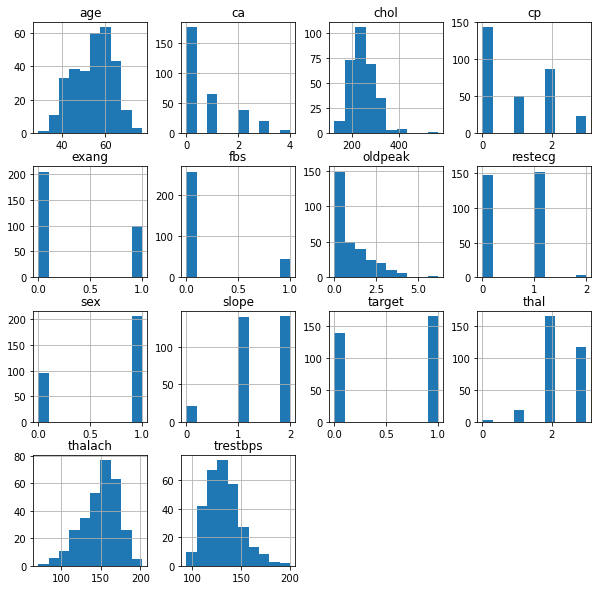

In [10]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca();
heart.hist(ax = ax);

## Check for the correlation between data

In [11]:
corr = heart.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


# Data Preparation 

## Convert to normal distribution 
Logistic Regression is a linear algorithm which means it has assumption about the distribution of our data. It assume that each our X's has gaussian distribution. So, in order to generate better result with logistic regresssion we have change our data's distribution. To change data distrubution we can use many methods:
- log
- root
- yeo-johnson
- box - cox

In this case, I use yeo-johnson method

In [12]:
# Make Distribution to Gaussian
yj = PowerTransformer(method="yeo-johnson")
heart["thalach_normal"] = yj.fit(heart[["thalach"]]).transform(heart[["thalach"]])
heart["oldpeak_normal"] = yj.fit(heart[["oldpeak"]]).transform(heart[["oldpeak"]])

## Encoding Data 
There are some categorical data that needed to be encode first because logistic regression not understand categorical variable, not like some cart algorithm.

In [13]:
# create dummy variable
a = pd.get_dummies(heart["sex"],prefix="sex")
b = pd.get_dummies(heart["cp"],prefix="cp")
c = pd.get_dummies(heart["fbs"],prefix="fbs")
d = pd.get_dummies(heart["restecg"],prefix="restecg")
e = pd.get_dummies(heart["exang"],prefix="exang")
f = pd.get_dummies(heart["slope"],prefix="slope")
g = pd.get_dummies(heart["ca"],prefix="ca")
h = pd.get_dummies(heart["thal"],prefix="thal")

heart = pd.concat([heart,a,b,c,d,e,f,g,h],axis=1)
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'thalach_normal',
       'oldpeak_normal', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0',
       'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

## Split Data

In [14]:
X = heart[["thalach_normal",'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3','restecg_0',
       'restecg_1', 'restecg_2','fbs_0', 'fbs_1','exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3']]
y = heart["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,stratify= y)

# Training Model 

## Models 


In [15]:
log_reg = LogisticRegression(random_state=32)

## Training 
Use cross validation to training data to see the training result for train data first.

In [16]:
cross_val_score(log_reg,X_train,y_train,cv=3,scoring="accuracy").mean()

0.8265432098765433

## Evaluation

In [17]:
log_reg.fit(X_train,y_train)
acc = log_reg.score(X_test,y_test)*100
acc 

91.80327868852459

In [18]:
prediction = log_reg.predict(X_test)
precision = precision_score(y_test,prediction)
print(f"Precision: {precision * 100}")

Precision: 88.88888888888889


In [19]:
confusion_matrix(y_test,prediction)

array([[24,  4],
       [ 1, 32]])

### Interpretation
Confusion matrix:
- FP : 3
- TP : 32
- TN : 25
- FN : 1

The result above can be interpreted as "correctly classified 32 test data as default class, correctly classified 24 test data as the other class, wrongly classified 4 test data as default class instead the other class, and wrongly classified 1 test data as the other class instead the default class"